In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, Y_train),(X_test, Y_test)= keras.datasets.fashion_mnist.load_data()
X_train.shape, X_test.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (10000, 28, 28))

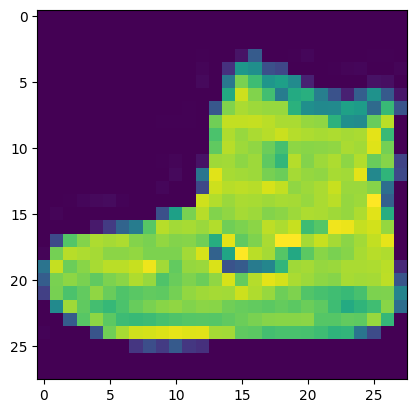

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [4]:
X_train=X_train/255
X_test=X_test/255

In [61]:
model =Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 512)               66048     
                                                                 
 dense_30 (Dense)            (None, 32)                16416     
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 316,650
Trainable params: 316,650
Non-tr

In [63]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [64]:
history= model.fit(X_train,Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5240 - accuracy: 0.8114 - val_loss: 0.4171 - val_accuracy: 0.8467
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3867 - accuracy: 0.8587 - val_loss: 0.3732 - val_accuracy: 0.8643
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3447 - accuracy: 0.8727 - val_loss: 0.3477 - val_accuracy: 0.8712
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.8808 - val_loss: 0.3664 - val_accuracy: 0.8677
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3066 - accuracy: 0.8868 - val_loss: 0.3480 - val_accuracy: 0.8759
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2858 - accuracy: 0.8942 - val_loss: 0.3292 - val_accuracy: 0.8823
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2748 - accuracy: 0.8998 - val_loss: 0.3147 - val_accuracy:

In [65]:
pred= model.predict(X_test)
pred= pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.8859

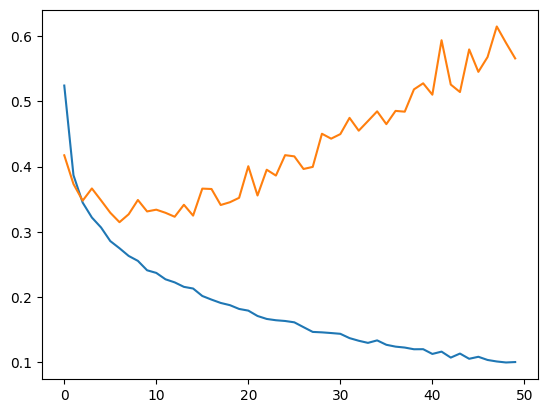

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

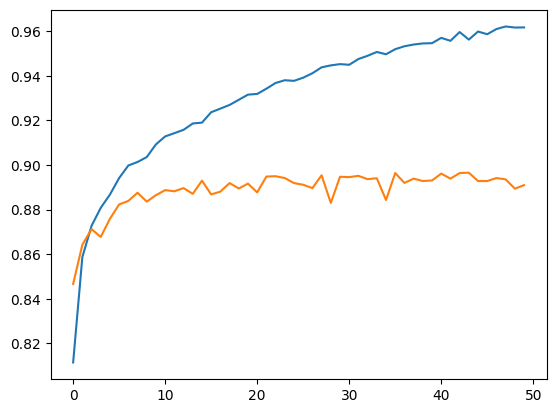

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])